In [1]:
import matplotlib.pyplot as plt
import numpy as np

# ARC color mapping (0–9) to RGB
ARC_COLORS = {
    0: (0, 0, 0),         # black
    1: (0, 0, 255),       # blue
    2: (255, 0, 0),       # red
    3: (0, 255, 0),       # green
    4: (255, 255, 0),     # yellow
    5: (128, 128, 128),   # grey
    6: (255, 192, 203),   # pink
    7: (255, 165, 0),     # orange
    8: (173, 216, 230),   # light blue
    9: (165, 42, 42),     # brown
}

def visualize_grids(input_grid, expected_output, predicted_output=None, pair_index=0):
    def to_rgb_array(grid):
        return np.array([[ARC_COLORS[cell] for cell in row] for row in grid], dtype=np.uint8)

    fig, axes = plt.subplots(1, 3 if predicted_output else 2, figsize=(9, 3))
    fig.suptitle(f"Train Pair {pair_index + 1}")

    axes[0].imshow(to_rgb_array(input_grid))
    axes[0].set_title("Input")
    axes[1].imshow(to_rgb_array(expected_output))
    axes[1].set_title("Expected Output")

    if predicted_output is not None:
        axes[2].imshow(to_rgb_array(predicted_output))
        axes[2].set_title("Predicted Output")

    for ax in axes:
        ax.axis("off")

    plt.tight_layout()
    plt.show()


📂 Using task: 4acc7107.json

🔍 Evaluating training pairs:
✅ Train pair 1: correct


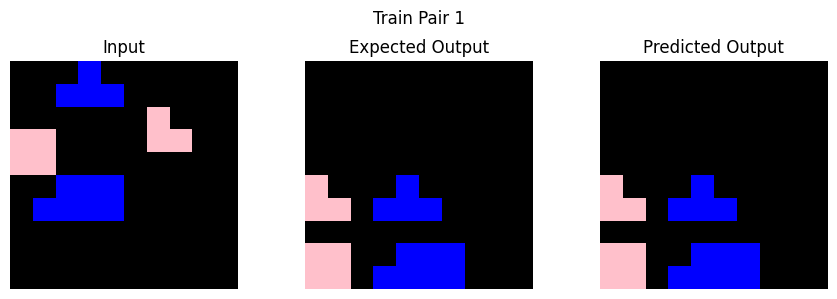

✅ Train pair 2: correct


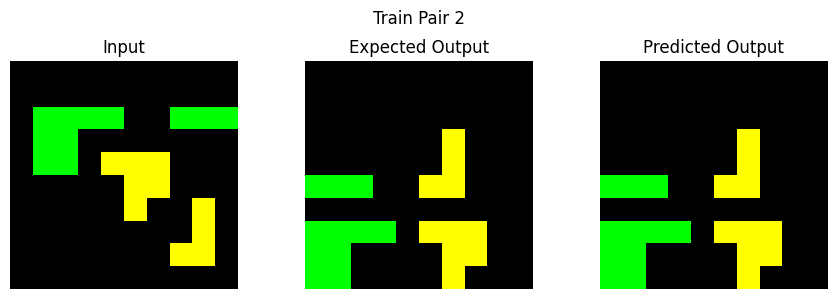

❌ Train pair 3: incorrect


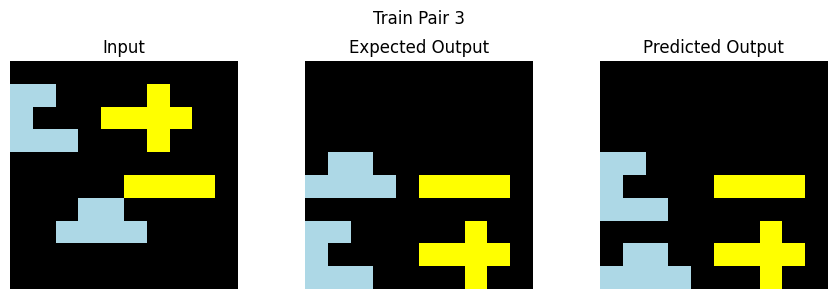

❌ Train pair 4: incorrect


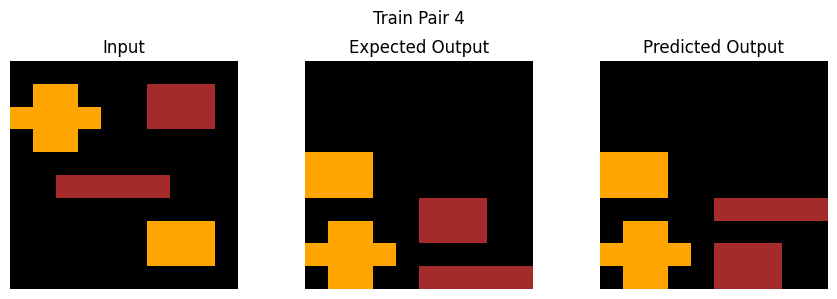


🔍 Evaluating test pairs:
✅ Test pair 1: correct


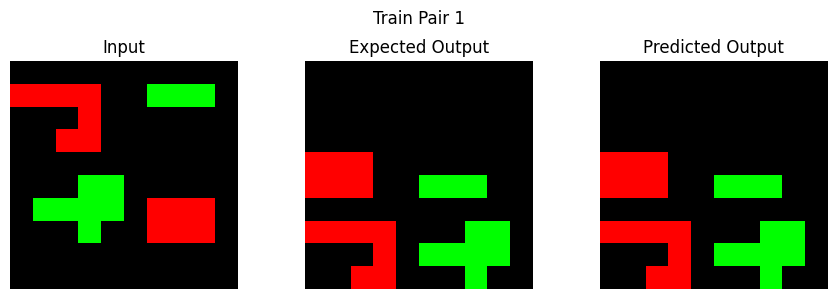


✅ Train score: 2/4 correct
🧪 Test score:  1/1 correct


In [24]:
import importlib.util
import json
import os

# === 1. Load all task filenames and sort them ===
task_folder = "Evaluation_set"
task_filenames = sorted([f for f in os.listdir(task_folder) if f.endswith(".json")])
task_index = 26  # Use your chosen task index
task_filename = task_filenames[task_index]
task_path = os.path.join(task_folder, task_filename)

print(f"📂 Using task: {task_filename}")

# === 2. Load ARC task ===
with open(task_path, "r") as f:
    task_data = json.load(f)

# === 3. Load solution from saved file ===
solution_path = f"Candidate_programs/task_7/solution_v1.py"
spec = importlib.util.spec_from_file_location("solution", solution_path)
module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module)
solve = module.solve

# === 4. Run the function on training pairs ===
train_correct = 0
train_total = len(task_data["train"])

print("\n🔍 Evaluating training pairs:")
for i, pair in enumerate(task_data["train"]):
    input_grid = pair["input"]
    expected_output = pair["output"]
    output = solve(input_grid)

    if output == expected_output:
        train_correct += 1
        print(f"✅ Train pair {i + 1}: correct")
    else:
        print(f"❌ Train pair {i + 1}: incorrect")
    
    visualize_grids(input_grid, expected_output, output, pair_index=i)

# === 5. Run the function on test pairs ===
test_correct = 0
test_total = len(task_data["test"])

print("\n🔍 Evaluating test pairs:")
for i, pair in enumerate(task_data["test"]):
    input_grid = pair["input"]
    expected_output = pair["output"]
    output = solve(input_grid)

    if output == expected_output:
        test_correct += 1
        print(f"✅ Test pair {i + 1}: correct")
    else:
        print(f"❌ Test pair {i + 1}: incorrect")
    
    visualize_grids(input_grid, expected_output, output, pair_index=i)

# === 6. Print results ===
print(f"\n✅ Train score: {train_correct}/{train_total} correct")
print(f"🧪 Test score:  {test_correct}/{test_total} correct")


Visualizing all training pairs for Task 8:


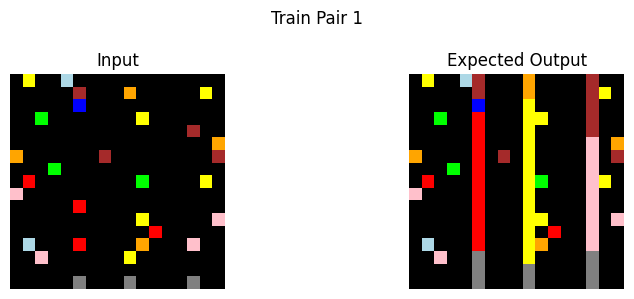

Train Pair 1:
[[0, 4, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 9, 0, 0, 0, 7, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7], [7, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 9], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0], [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 2, 0, 0, 0, 0, 7, 0, 0, 0, 6, 0, 0], [0, 0, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0]]
[[0, 4, 0, 0, 8, 9, 0, 0, 0, 7, 0, 0, 0, 0, 9, 0, 0], [0, 0, 0, 0, 0, 9, 0, 0, 0, 7,

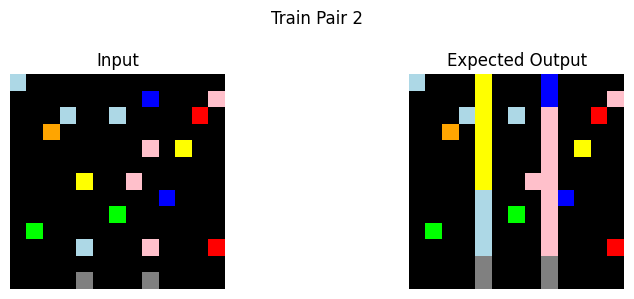

Train Pair 2:
[[8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6], [0, 0, 0, 8, 0, 0, 8, 0, 0, 0, 0, 2, 0], [0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 4, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 6, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0]]
[[8, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 6], [0, 0, 0, 8, 4, 0, 8, 0, 6, 0, 0, 2, 0], [0, 0, 7, 0, 4, 0, 0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 6, 0, 4, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 6, 6, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 6, 1, 0, 0, 0], [0, 0, 0, 0, 8, 0, 3, 0, 6, 0, 0, 0, 0], [0, 3, 0, 0, 8, 0, 0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 6, 0, 0, 0, 2], 

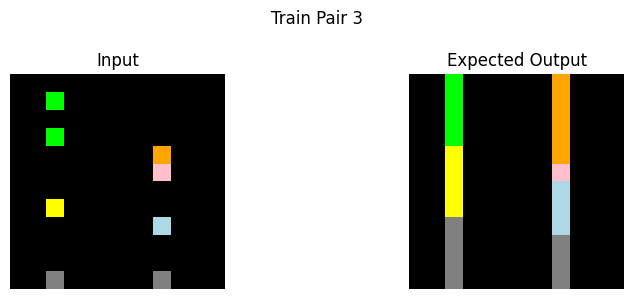

Train Pair 3:
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0]]
[[0, 0, 3, 0, 0, 0, 0, 0, 7, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 7, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 7, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 7, 0, 0, 0], [0, 0, 4, 0, 0, 0, 0, 0, 7, 0, 0, 0], [0, 0, 4, 0, 0, 0, 0, 0, 6, 0, 0, 0], [0, 0, 4, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 4, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0]]


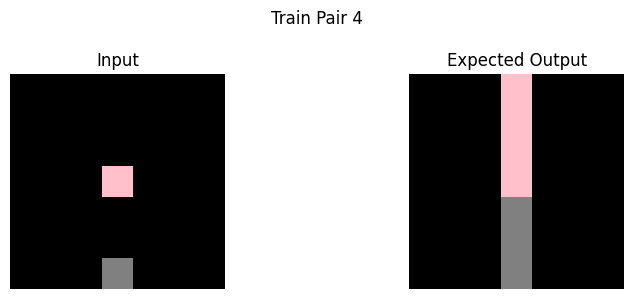

Train Pair 4:
[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0]]
[[0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0]]


In [21]:
# Define the index of the task to be plotted
task_index_to_plot = 7  # Change this value to select a different task

# Load the task data for the specified index
task_filename_to_plot = task_filenames[task_index_to_plot]
task_path_to_plot = os.path.join(task_folder, task_filename_to_plot)

with open(task_path_to_plot, "r") as f:
    task_data_to_plot = json.load(f)

# Plot all training pairs for the selected task
print(f"Visualizing all training pairs for Task {task_index_to_plot + 1}:")
for i, pair in enumerate(task_data_to_plot["train"]):
    input_grid_to_plot = pair["input"]
    output_grid_to_plot = pair["output"]
    visualize_grids(input_grid_to_plot, output_grid_to_plot, pair_index=i)

    print(f"Train Pair {i + 1}:")
    print(task_data_to_plot["train"][i]["input"])
    print(task_data_to_plot["train"][i]["output"])



🎯 Random task selected: 7039b2d7.json


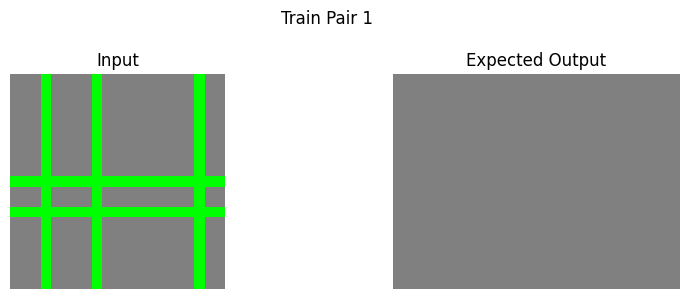

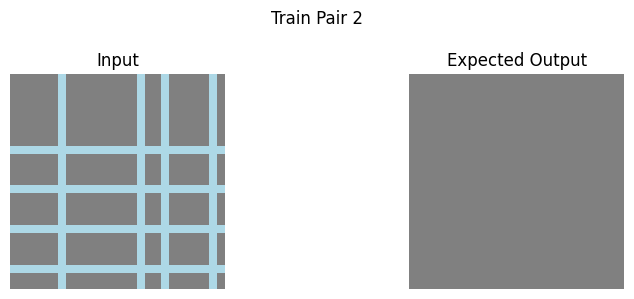

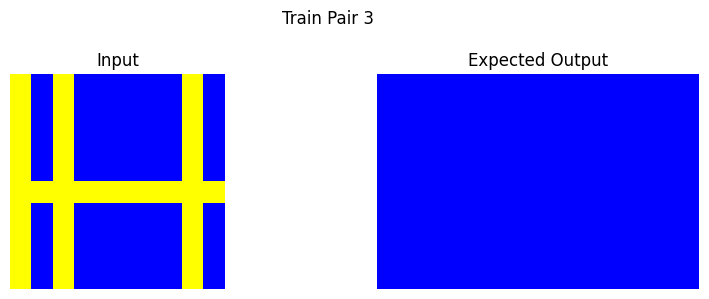

In [4]:
import os
import json
import random

# 1. Load and sort task filenames
task_folder = "Evaluation_set"
task_filenames = sorted([f for f in os.listdir(task_folder) if f.endswith(".json")])

# 2. Pick a random task
random_task = random.choice(task_filenames)
task_path = os.path.join(task_folder, random_task)

# 3. Load the task
with open(task_path, "r") as f:
    task_data = json.load(f)

print(f"🎯 Random task selected: {random_task}")

# 4. Visualize each training pair
for i, pair in enumerate(task_data["train"]):
    visualize_grids(pair["input"], pair["output"], pair_index=i)


In [5]:
import os

# Define task name to look for
target_task = "da2b0fe3.json"

# Load and sort all task filenames
task_folder = "Evaluation_set"
task_filenames = sorted([f for f in os.listdir(task_folder) if f.endswith(".json")])

# Find index (0-based)
if target_task in task_filenames:
    index = task_filenames.index(target_task)
    print(f"✅ Task '{target_task}' is at position {index} (0-based), task number {index + 1}.")
else:
    print(f"❌ Task '{target_task}' not found in evaluation set.")


✅ Task 'da2b0fe3.json' is at position 82 (0-based), task number 83.
